# Compare whole_year vs monthly-independent

The idea here is to compare best models for whole year vs best models for monthly independent. For this, we will separate the prediction done by the whole year model by month, so we can compare visually and numerically (mae) which model is better. 

The hypothesis is that wholeyear model has more sample to train but gets biased toward some months, so MAE should be a lot higher than the best models by month. 

In [1]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape

import os
import numpy as np
import sys
import tensorflow as tf
import random
import keras
import matplotlib.pyplot as plt

SEED = 42


def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

FIRST_YEAR= 1972
FREQUENCY= "monthly"

c:\Users\marti\Desktop\data\hw_extra


In [3]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel,
    get_info_experiment,
    SERA,
    summarize_best_results_by_index
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]
bounds = (-1.1692892810242344, -0.30647585455315646, 3.0, 6.499969486244418)

## Chile good predictions whole year

In [5]:
region="chile"
metadata = pd.read_csv(f"data/climate_features/{region}/metadata.csv")
metadata.reset_index(inplace=True, drop=True)
metadata.rename(columns={"id":"id_data"}, inplace=True)
display(metadata)

,id_data,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...
247,458d357c,predictor_458d357c_8.parquet,8,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
248,458d357c,predictor_458d357c_9.parquet,9,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
249,458d357c,predictor_458d357c_10.parquet,10,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
250,458d357c,predictor_458d357c_11.parquet,11,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


### Year

In [6]:
ids_to_execute = ["3832cbd6"]
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
13e2f761,index_13e2f761.parquet,max,1,MSL,260|284|-55|-25,NoRef,1972-2022
aa75d48e,index_aa75d48e.parquet,anom,1,U,287|289|-42|-33,1980-2010,1972-2022
2748fd3a,index_2748fd3a.parquet,anom,1,MSL,290|295|-42|-33,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022
a66b8219,index_a66b8219.parquet,anom,1,MSL,291|295|-38|-30,1980-2010,1972-2022


2/2 [==============================] - 0s 2ms/step


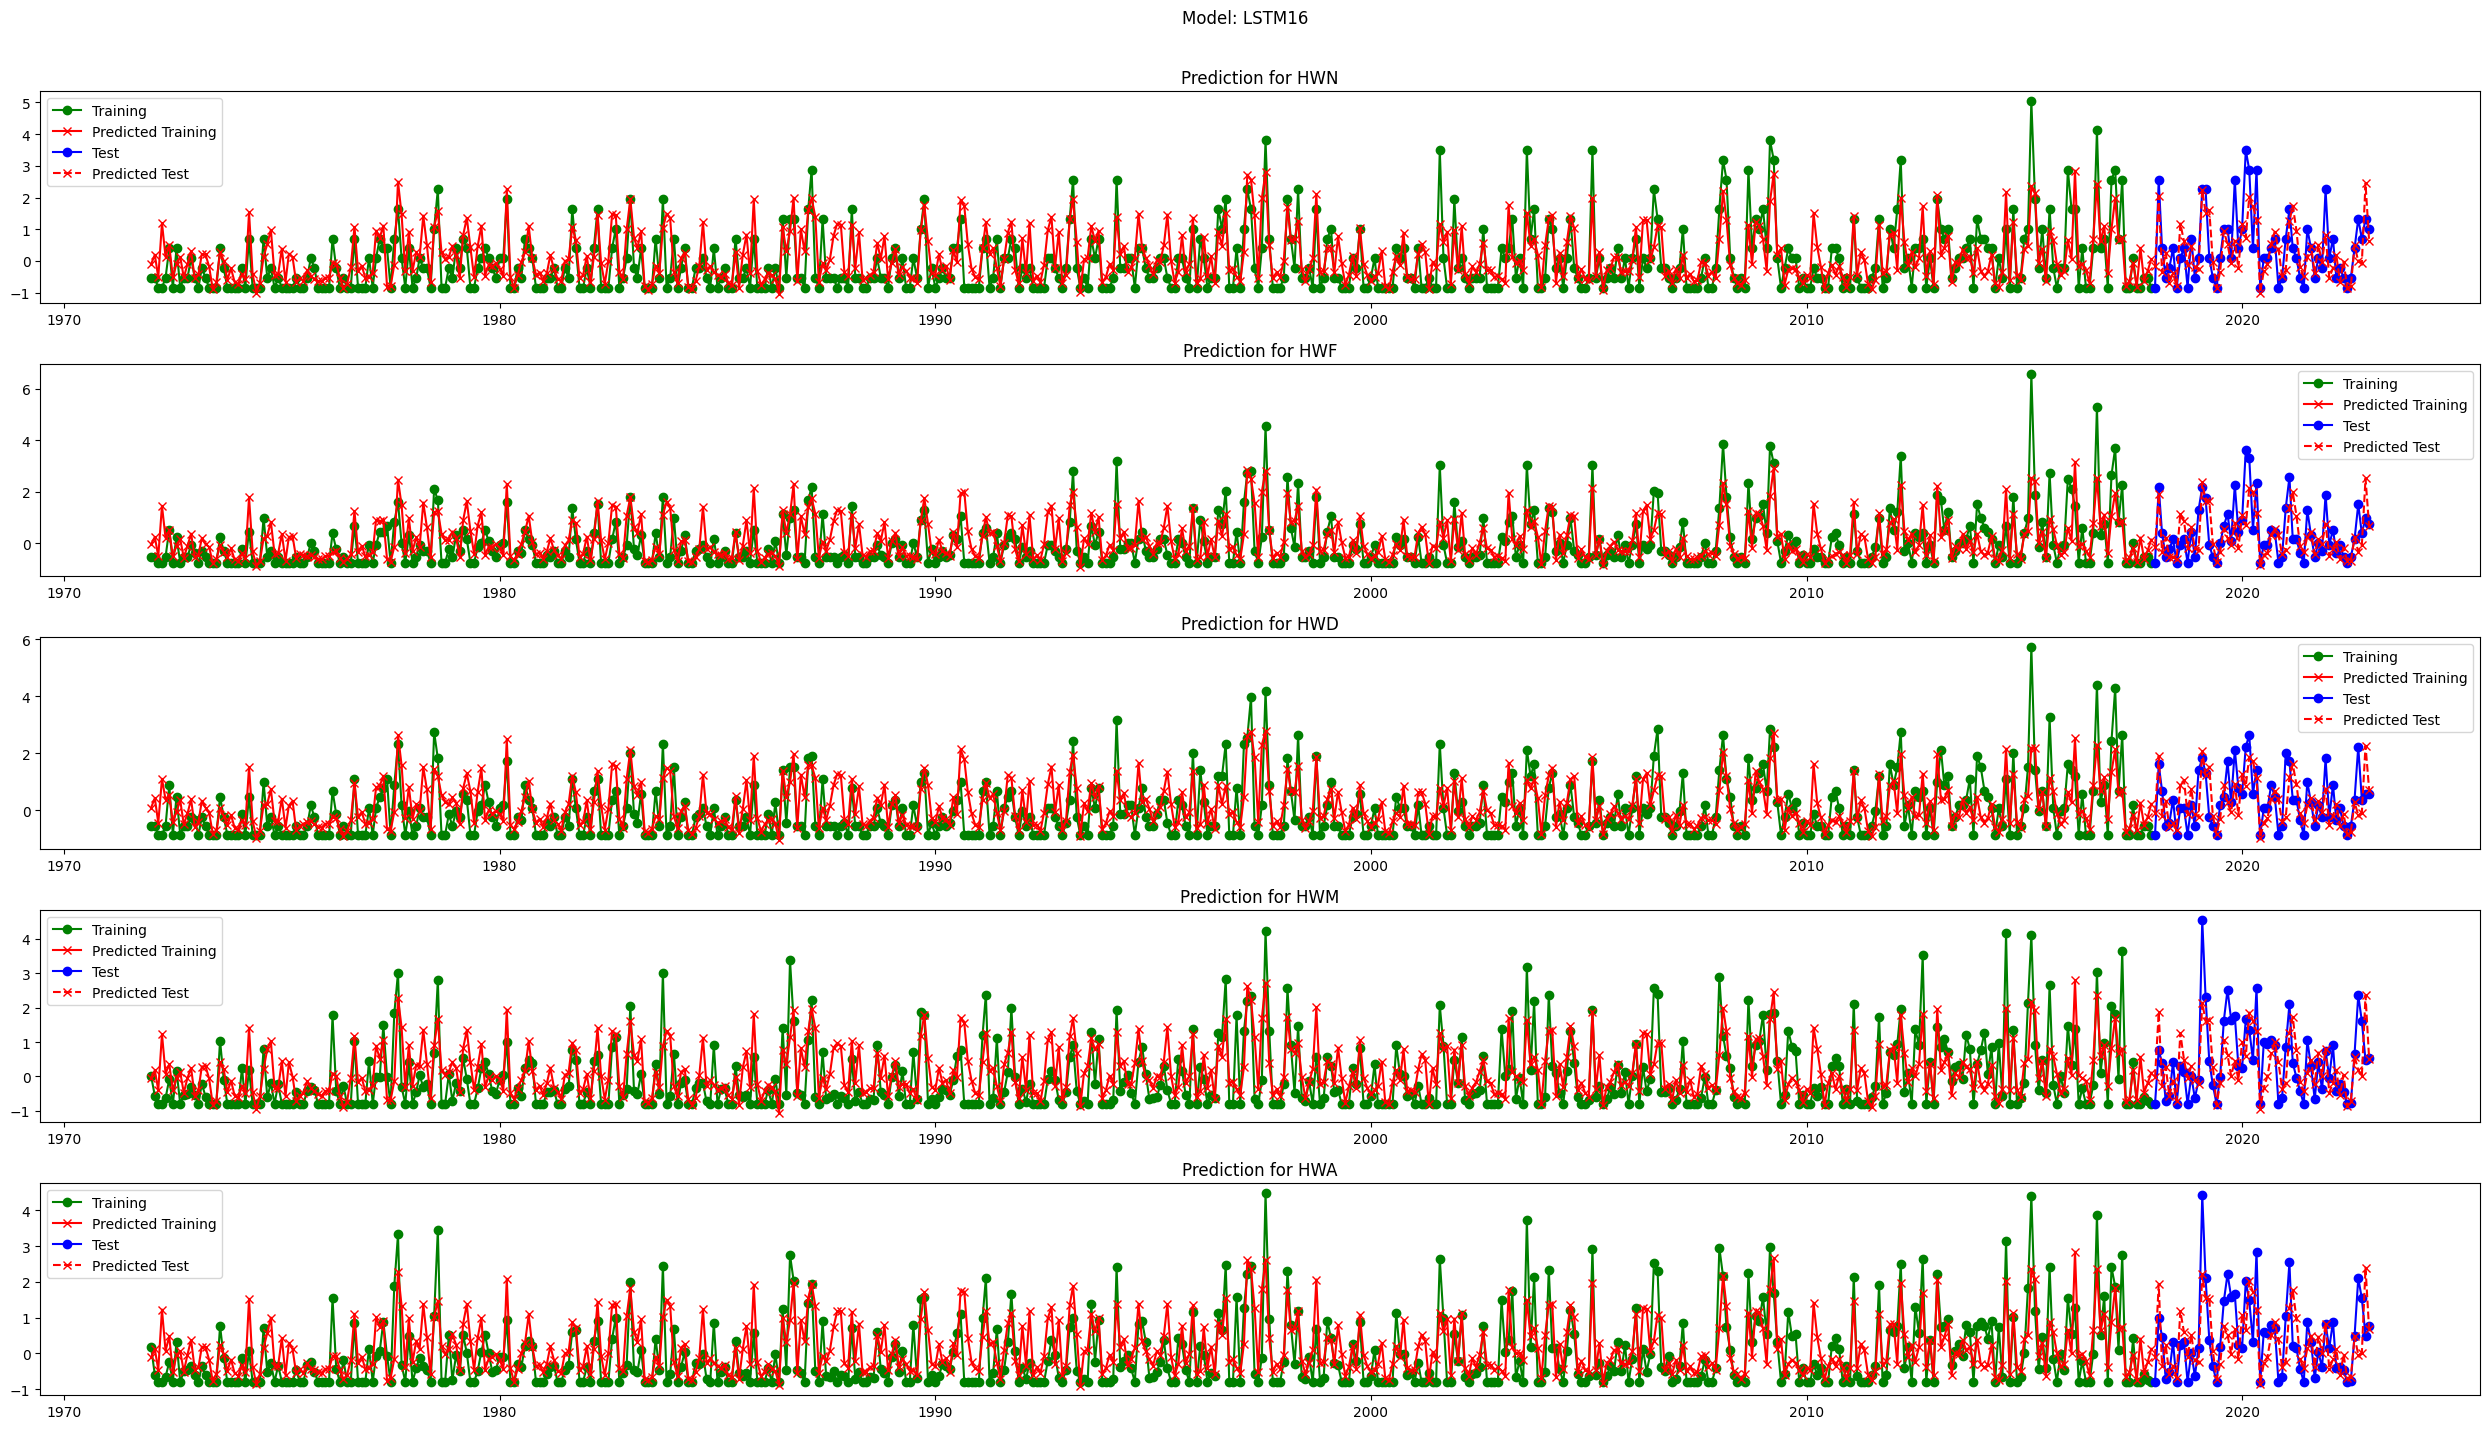

In [7]:
data = pd.read_parquet(f"data/climate_features/{region}/predictor_{ids_to_execute[0]}_year_v2.parquet")
season = 1
len_pred = 60
model = Sequential([
    LSTM(16, activation="tanh", input_shape=(1, len(data.columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
pred = PredictionModel(data, season, indices_of_interest, model, name_regressor="LSTM16",loss_fn=SERA(bounds=bounds,T=100,fn='piecewise2', initial_weight=0.3), whole_year=True)
pred.compile_keras_model(metrics='mae')
y_train, y_pred_train = pred.train(len_pred)
y_test, y_pred = pred.predict(len_pred)
dates = pd.date_range(pd.to_datetime(f"1972-{season}"),periods=len(y_train) + len(y_test),freq=pd.offsets.MonthBegin(1))
pred.plot_predictions(dates, len_pred, y_train, y_pred_train, y_test, y_pred)

In [8]:
year_mae = pred.get_metric("mae")[-6:-1]

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
mae_season = {index: [] for index in indices_of_interest} 
y_test = y_test.to_numpy()
for i in range(12):
    pos_season = [12*k + i for k in range(5)]
    for idx,index in enumerate(indices_of_interest):
        mae_season[index].append(mean_absolute_error(y_test[pos_season, idx], y_pred[pos_season, idx]))

In [11]:
colors = {
    0: 'black',
    1: 'red',
    2: 'red',
    3: 'yellow',
    4: 'yellow',
    5: 'yellow',
    6: 'blue',
    7: 'blue',
    8: 'blue',
    9: 'green',
    10: 'green',
    11: 'green',
    12: 'red'
}

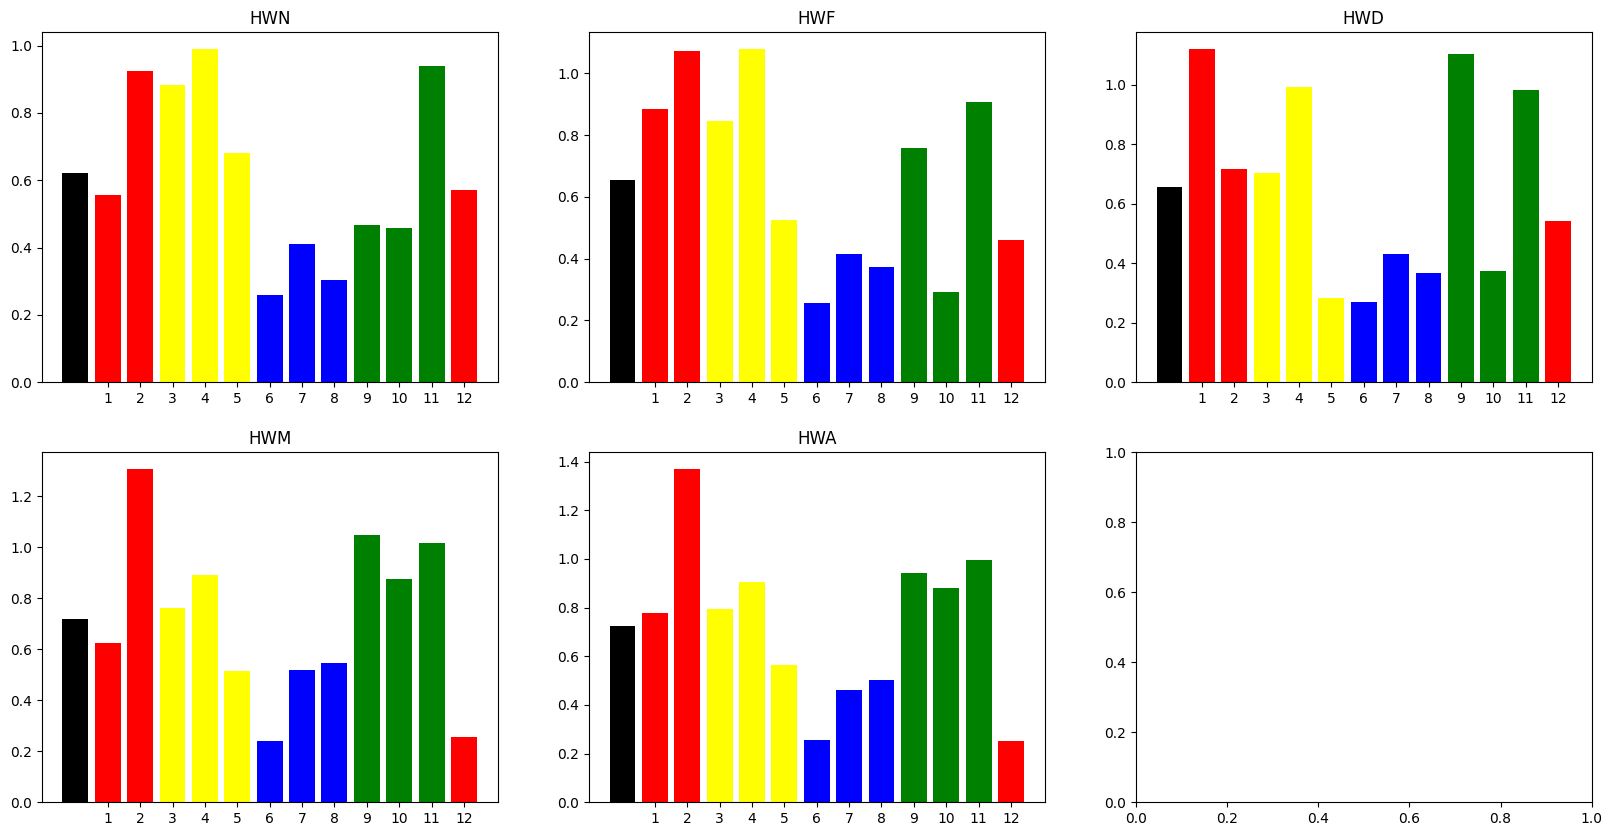

In [12]:

fig, axs = plt.subplots(2,3, figsize=(20,10))
axs = axs.flatten()
for i,label in enumerate(indices_of_interest):
    for k in range(13):
        if k == 0:
            axs[i].bar(k,[year_mae[i]], color=colors[k])
        else:
            axs[i].bar(k,mae_season[label][k-1], color=colors[k])
    axs[i].set_xticks(range(1,13))
    axs[i].set_title(f"{label}")

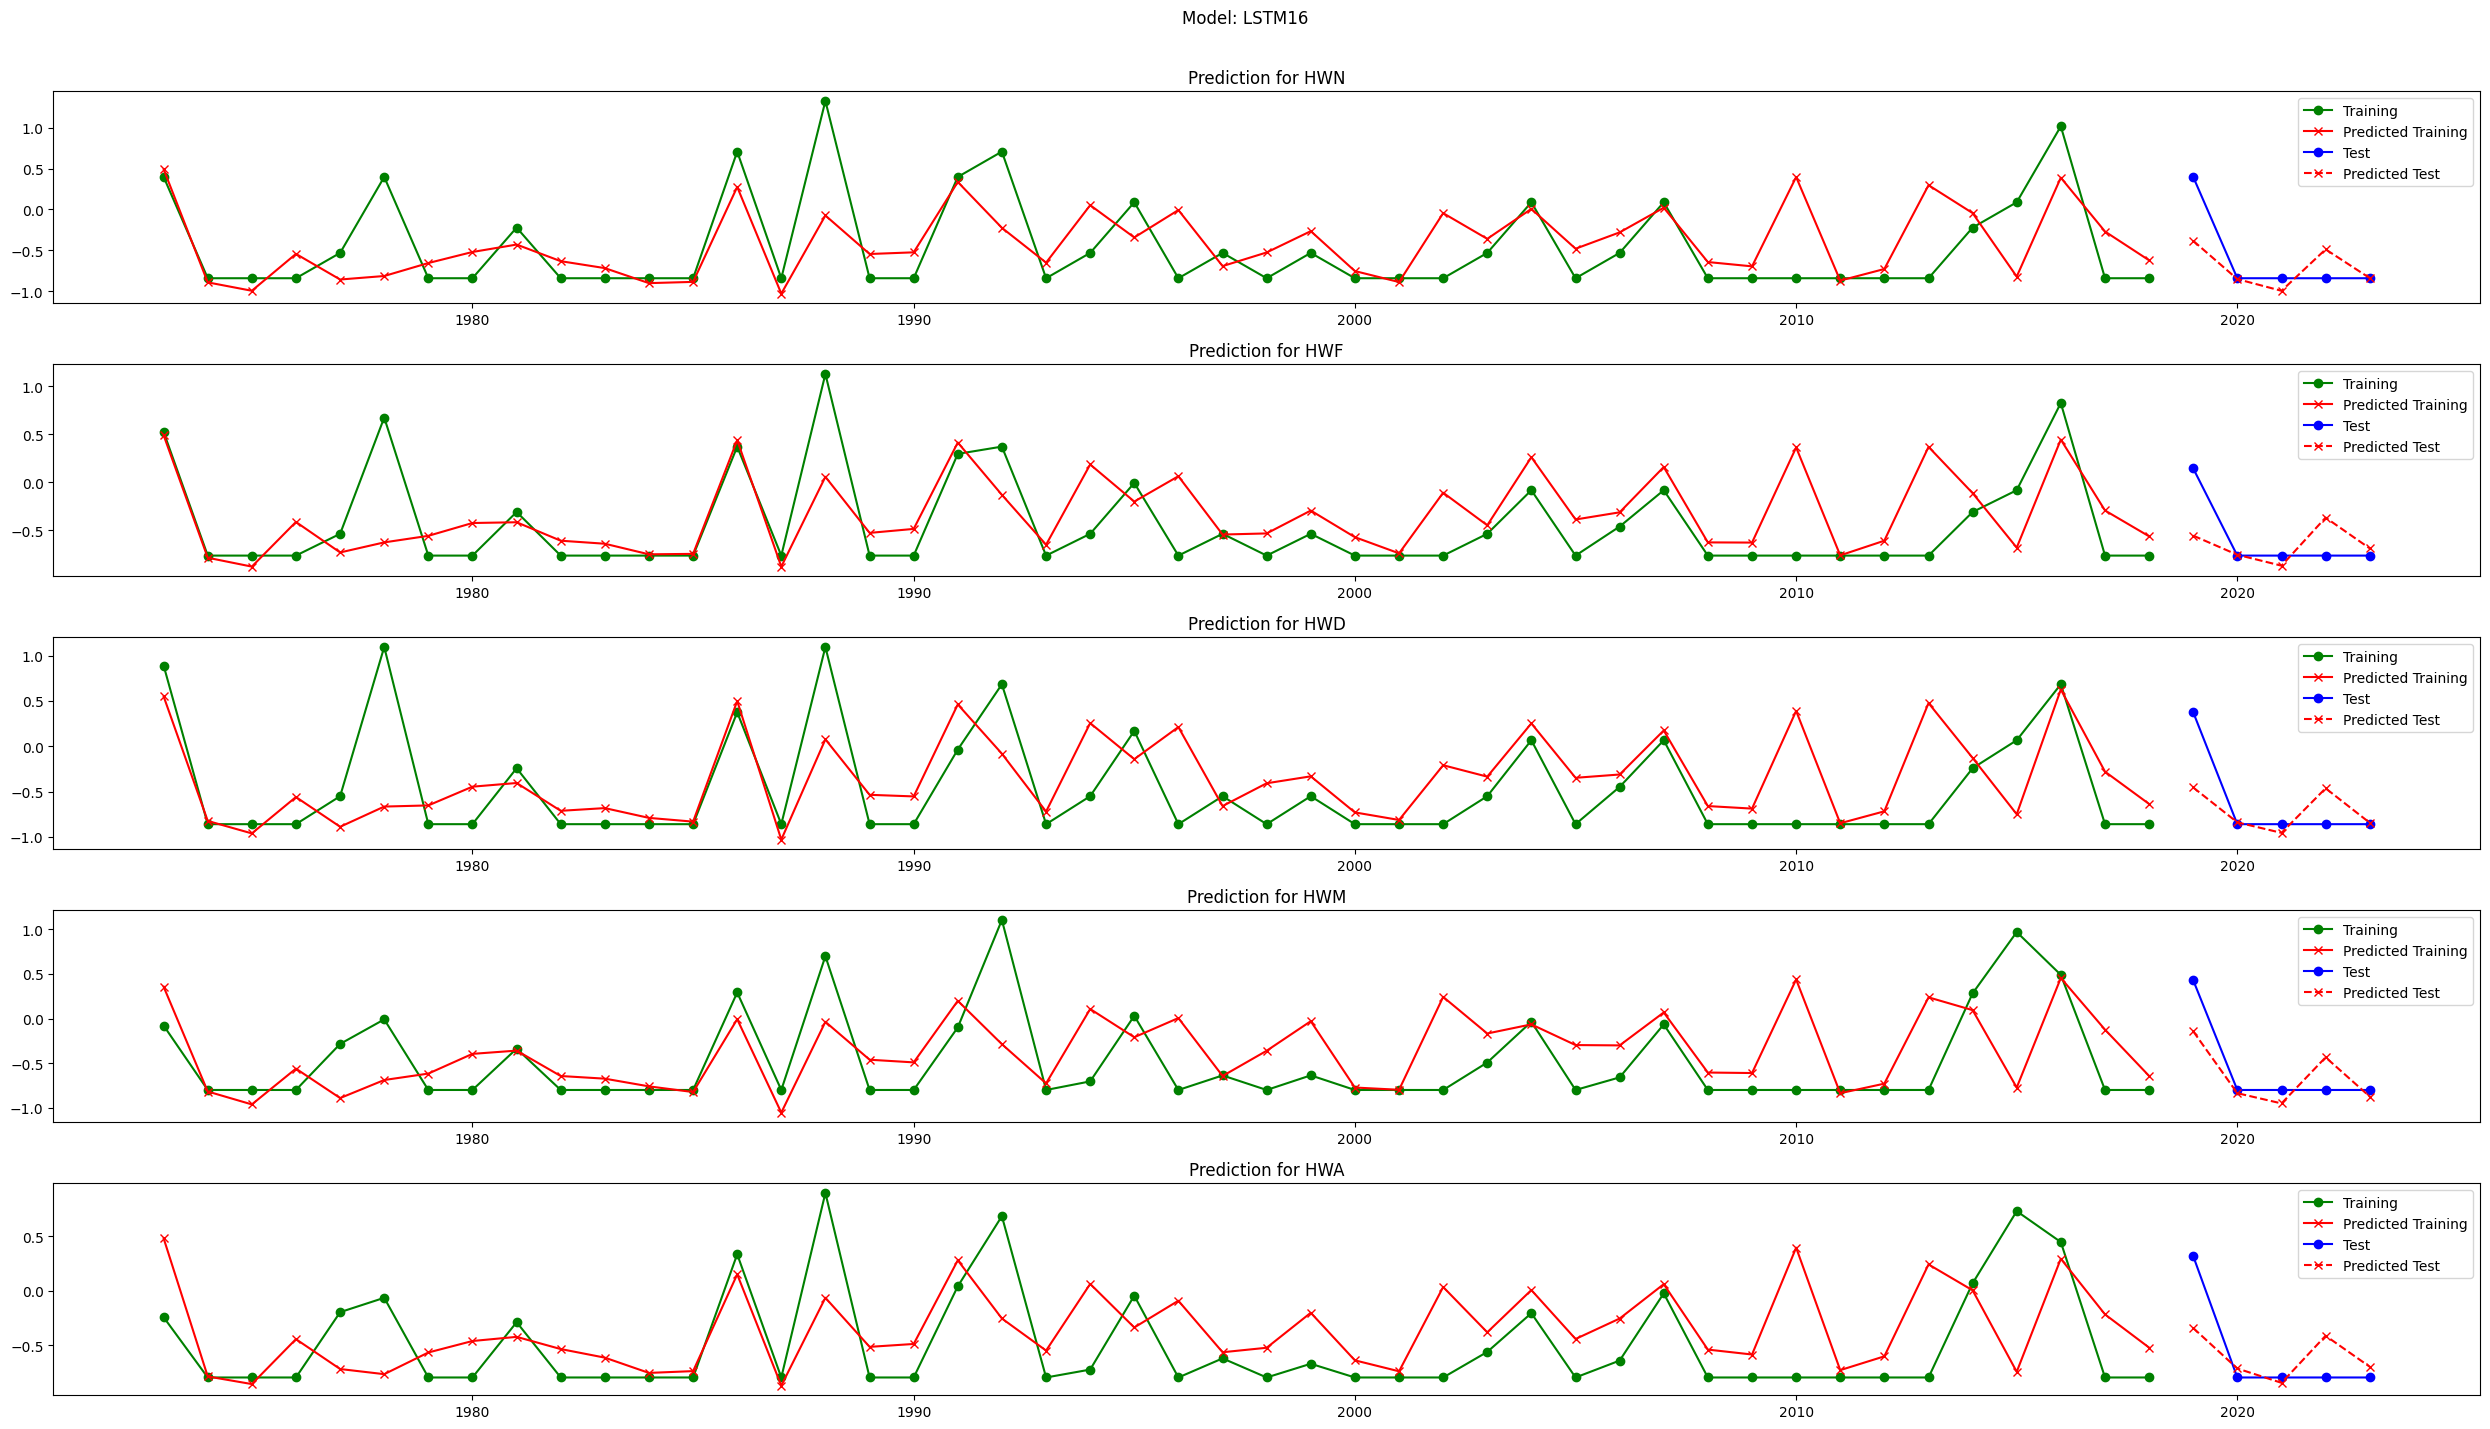

In [13]:
season_to_plot = 6
y_train_season = y_train[y_train.index.month==season_to_plot]
y_pred_train_season = y_pred_train[[12*k+5 for k in range(46)],:]

y_test_season = y_test[[12*k+(season_to_plot-1) for k in range(5)],:]
y_pred_season = y_pred[[12*k+(season_to_plot-1) for k in range(5)],:]

dates = pd.date_range(pd.to_datetime(f"1972-{season_to_plot}"),periods=len(y_train_season) + len(y_test_season),freq=pd.offsets.YearBegin(1))
pred.plot_predictions(dates, 5, y_train_season, y_pred_train_season, y_test_season, y_pred_season)

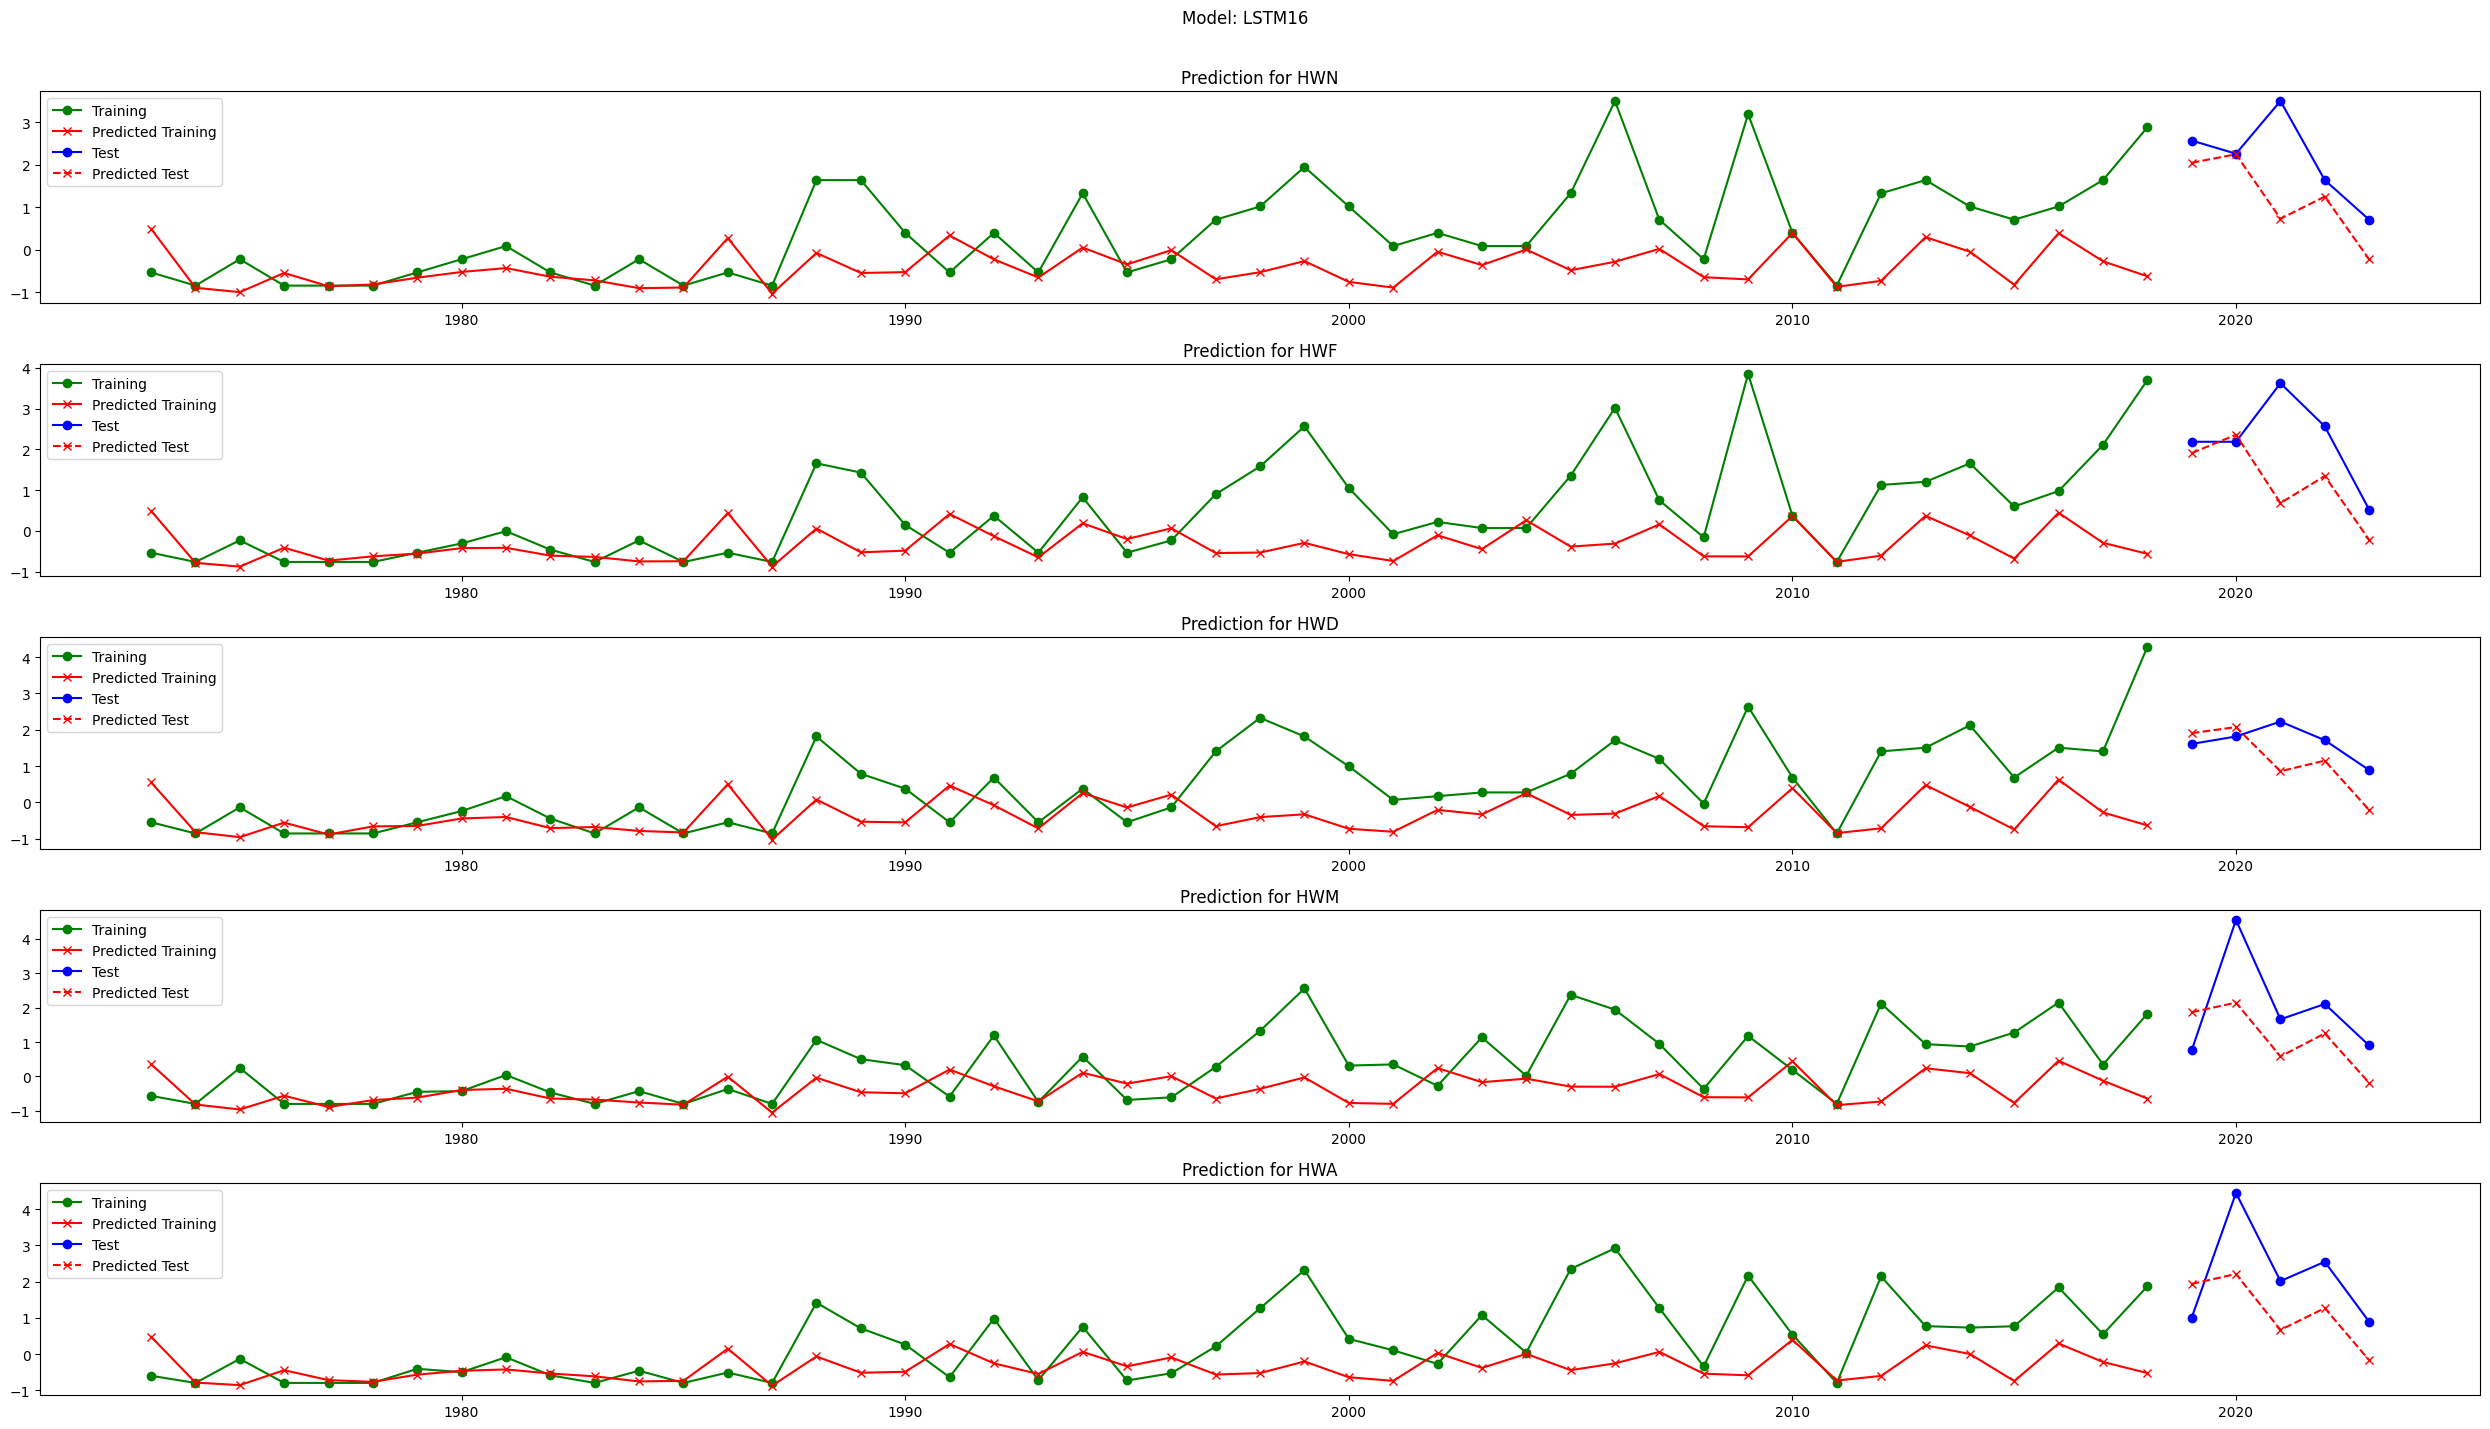

In [14]:
season_to_plot = 2
y_train_season = y_train[y_train.index.month==season_to_plot]
y_pred_train_season = y_pred_train[[12*k+5 for k in range(46)],:]

y_test_season = y_test[[12*k+(season_to_plot-1) for k in range(5)],:]
y_pred_season = y_pred[[12*k+(season_to_plot-1) for k in range(5)],:]

dates = pd.date_range(pd.to_datetime(f"1972-{season_to_plot}"),periods=len(y_train_season) + len(y_test_season),freq=pd.offsets.YearBegin(1))
pred.plot_predictions(dates, 5, y_train_season, y_pred_train_season, y_test_season, y_pred_season)

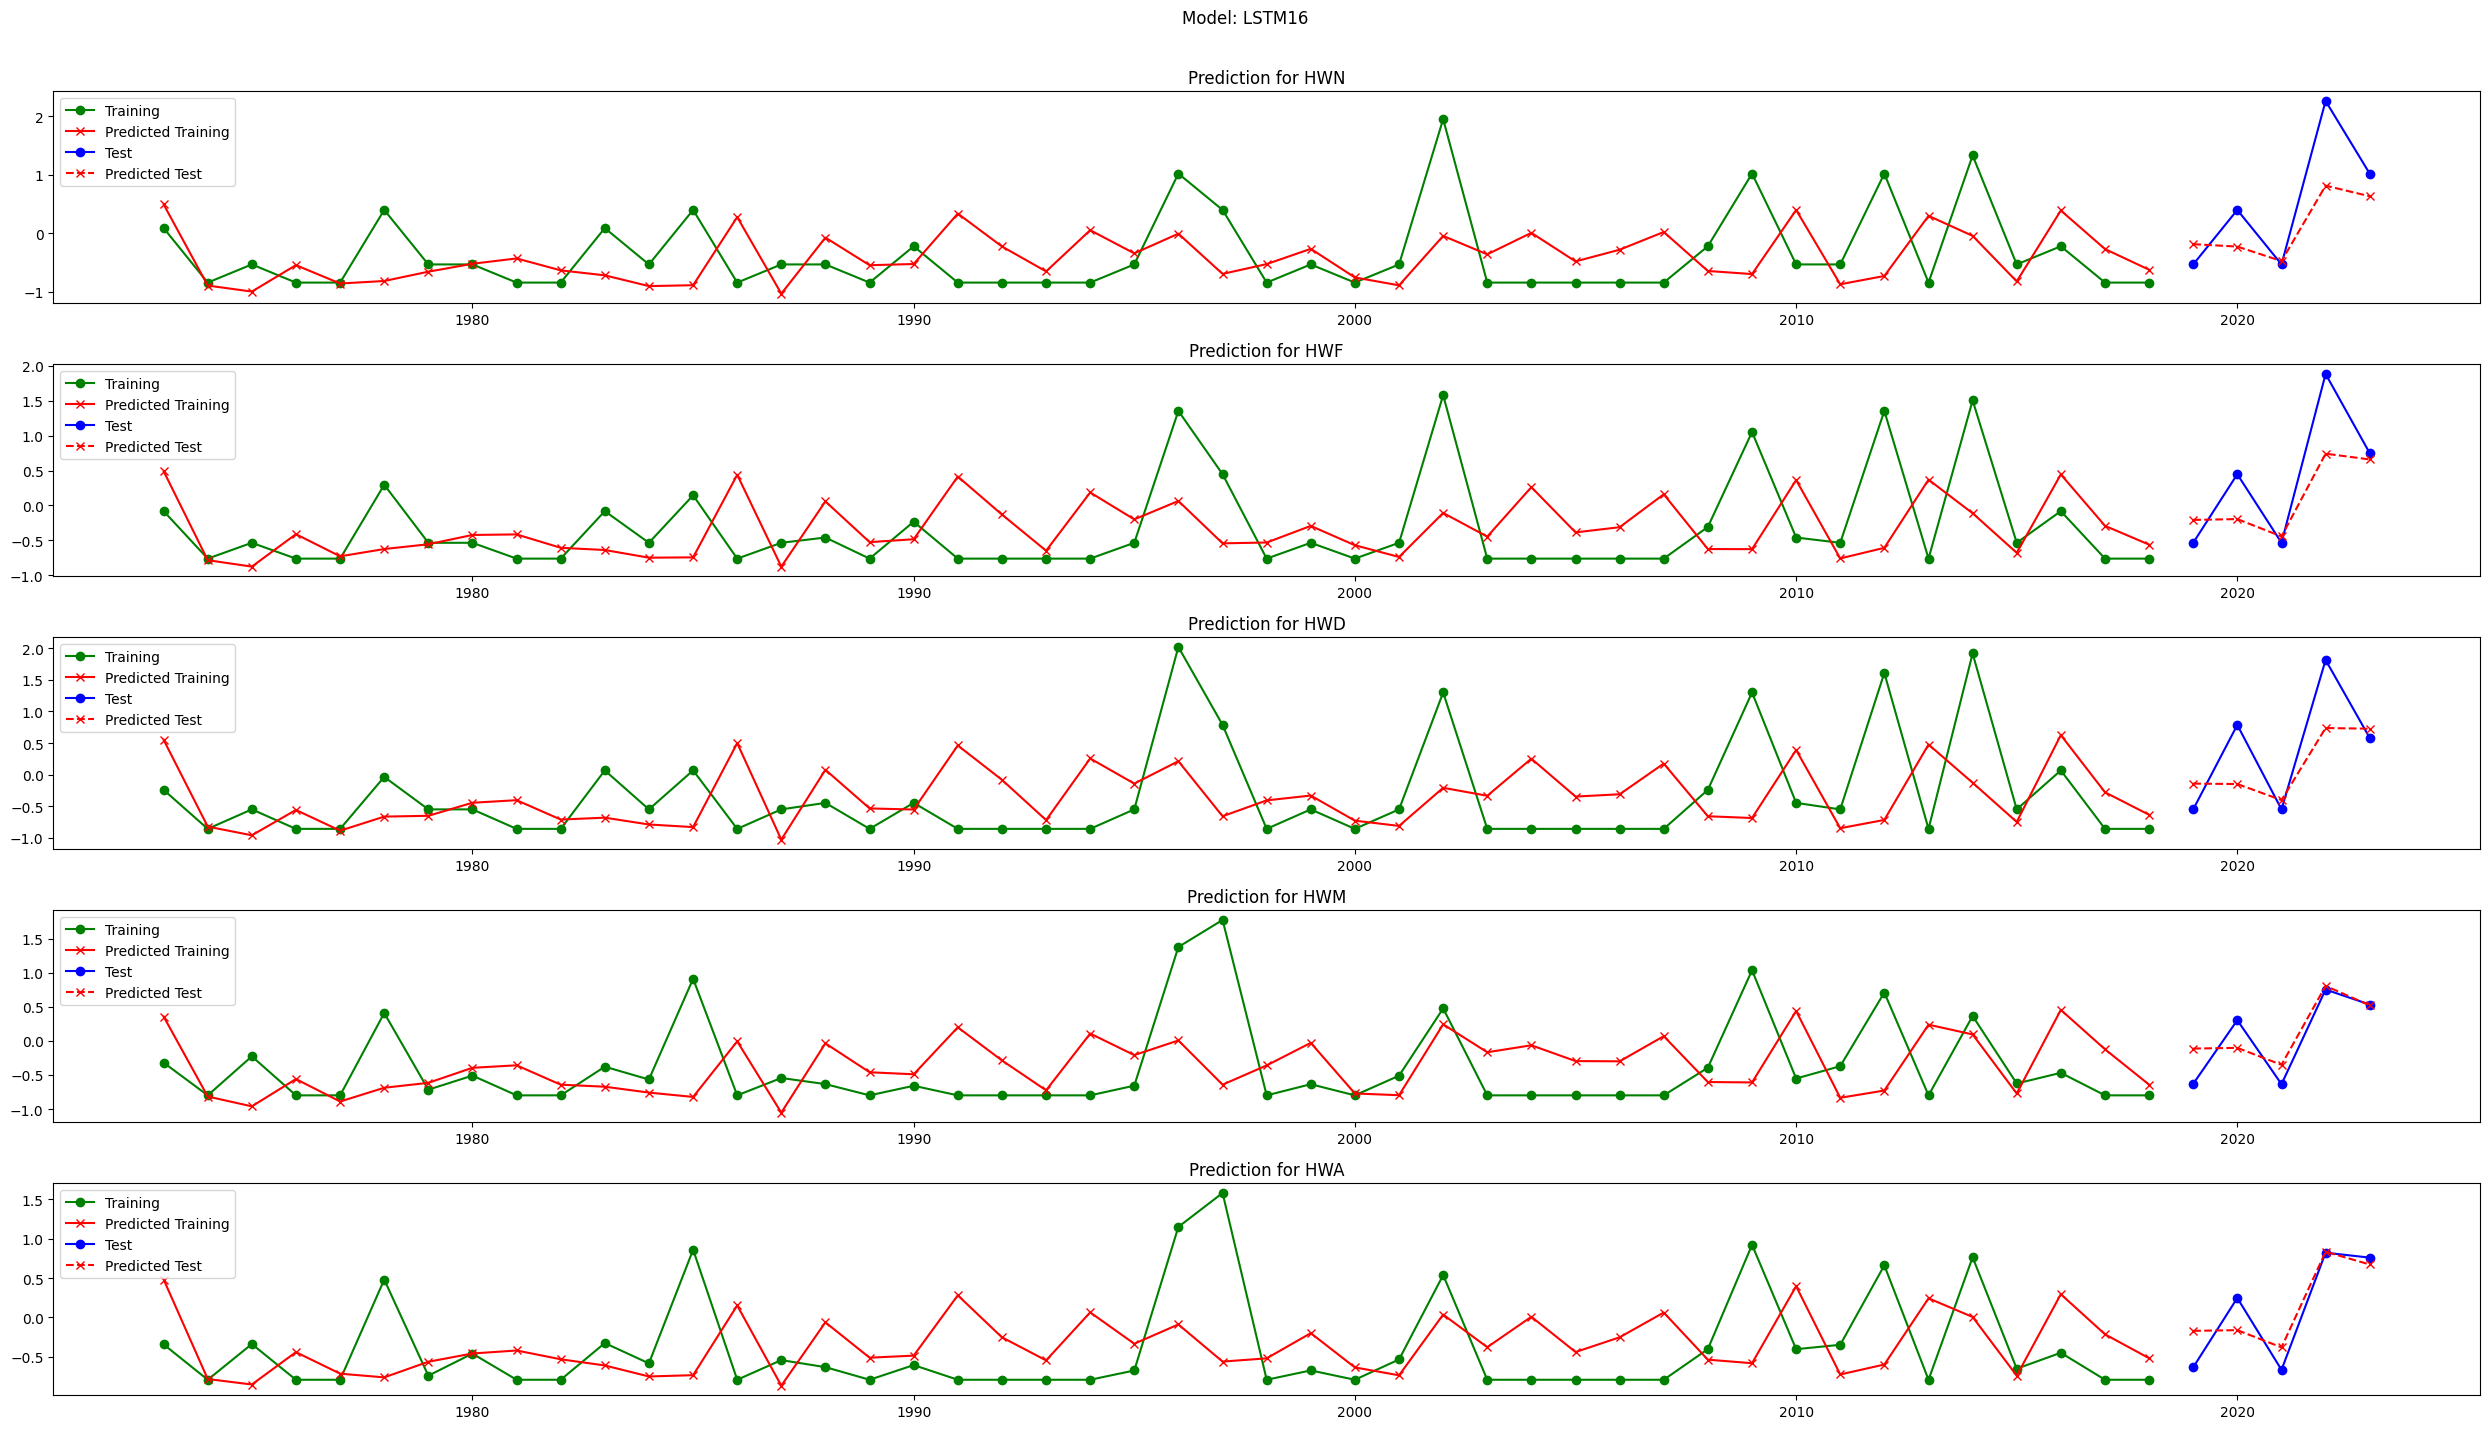

In [15]:
season_to_plot = 12
y_train_season = y_train[y_train.index.month==season_to_plot]
y_pred_train_season = y_pred_train[[12*k+5 for k in range(46)],:]

y_test_season = y_test[[12*k+(season_to_plot-1) for k in range(5)],:]
y_pred_season = y_pred[[12*k+(season_to_plot-1) for k in range(5)],:]

dates = pd.date_range(pd.to_datetime(f"1972-{season_to_plot}"),periods=len(y_train_season) + len(y_test_season),freq=pd.offsets.YearBegin(1))
pred.plot_predictions(dates, 5, y_train_season, y_pred_train_season, y_test_season, y_pred_season)

## Check on monthly results

In [16]:
results = pd.read_csv(f"data/sera_results_v2/chile_results/results.csv")


In [17]:
cv_sera_seasons = {}
sera_seasons = {}
tscv_sera_seasons = {}

cv_mae_seasons = {}
mae_seasons = {}
tscv_mae_seasons = {}

for i in range(13):
    results_season = results[results["season"]==i]
    cv_sera_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="sera",stage="CV" , top_n=1, sera=True)
    tscv_sera_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="sera",stage="TSCV" , top_n=1, sera=True)
    sera_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="sera",stage="prediction", top_n=1, sera=True)
    cv_mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="CV" , top_n=1, sera=True)
    tscv_mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="TSCV" , top_n=1, sera=True)
    mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="prediction", top_n=1, sera=True)

cv_sera_seasons = pd.concat(list(cv_sera_seasons.values()))
tscv_sera_seasons = pd.concat(list(tscv_sera_seasons.values()))
sera_seasons = pd.concat(list(sera_seasons.values()))
cv_mae_seasons = pd.concat(list(cv_mae_seasons.values()))
tscv_mae_seasons = pd.concat(list(tscv_mae_seasons.values()))
mae_seasons = pd.concat(list(mae_seasons.values()))



In [18]:
mae_seasons

,best_value,model,Bounds,I_w,index,training_value,id_data,filename,season,indices
0,0.492678,RNN16,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,Average,0.899107,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
1,0.241280,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWA,0.724163,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,0.471418,MLP16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWD,0.374549,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
3,0.334735,LSTM16,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,HWF,0.395335,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
4,0.184626,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWM,0.392415,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...,...,...,...,...,...,...
1,0.226765,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWA,0.572695,3df87a13,predictor_3df87a13_12.parquet,12,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...
2,0.225540,MLP16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWD,0.290734,9f8163e4,predictor_9f8163e4_12.parquet,12,fde0e327-340e2882-8c5bce37-880b8b63-c6b80290-3...
3,0.327855,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWF,0.536252,3df87a13,predictor_3df87a13_12.parquet,12,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...
4,0.206706,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWM,0.574429,3df87a13,predictor_3df87a13_12.parquet,12,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...


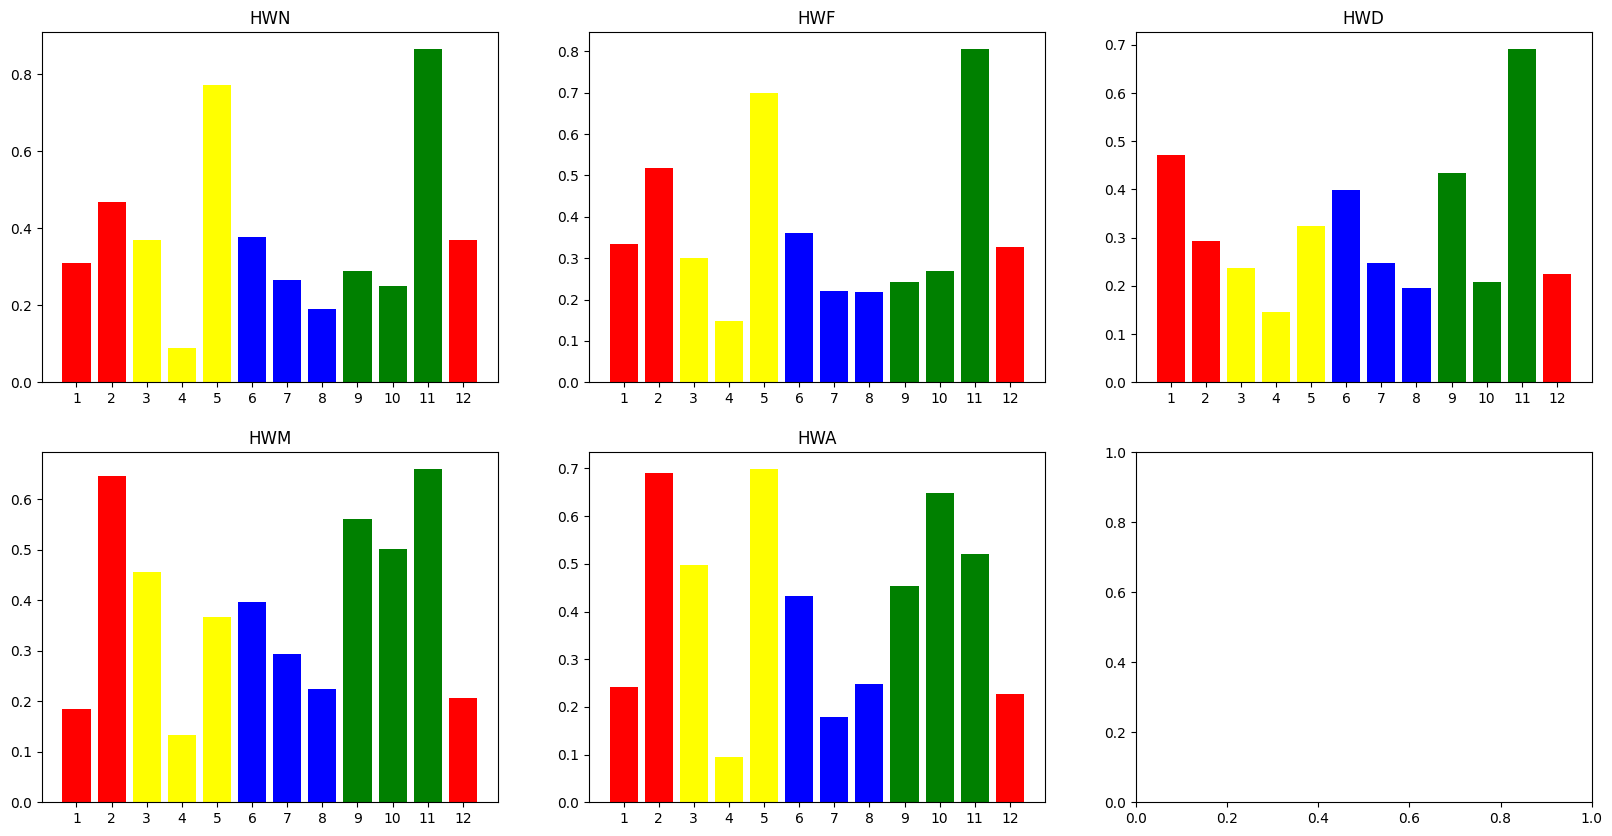

In [19]:
fig, axs = plt.subplots(2,3, figsize=(20,10))
axs = axs.flatten()
for i,label in enumerate(indices_of_interest):
    for k in range(1, 13):
        axs[i].bar(k,mae_seasons[(mae_seasons["season"]==k) & (mae_seasons["index"]==label)]["best_value"], color=colors[k])
    axs[i].set_xticks(range(1,13))
    axs[i].set_title(f"{label}")

In [38]:
mae_seasons[mae_seasons["season"]==k] 

,best_value,model,Bounds,I_w,index,training_value,id_data,filename,season,indices
0,0.440191,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,Average,0.333511,8c95fd00,predictor_8c95fd00_10.parquet,10,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
1,0.648852,MLP16,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,HWA,0.281084,9bd58418,predictor_9bd58418_10.parquet,10,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
2,0.648852,MLP16,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,HWA,0.800133,9bd58418,predictor_9bd58418_10.parquet,10,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
3,0.207932,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWD,0.315166,8c95fd00,predictor_8c95fd00_10.parquet,10,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
4,0.269096,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWF,0.308993,8c95fd00,predictor_8c95fd00_10.parquet,10,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
5,0.500888,LSTM16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWM,0.129660,9f8163e4,predictor_9f8163e4_10.parquet,10,fde0e327-340e2882-8c5bce37-880b8b63-c6b80290-3...
6,0.250479,RNN16,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,HWN,0.265625,8c95fd00,predictor_8c95fd00_10.parquet,10,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...


C:\Users\marti\AppData\Local\Temp\ipykernel_16304\267646493.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if float(year_value) > float(monthly_value.unique()):


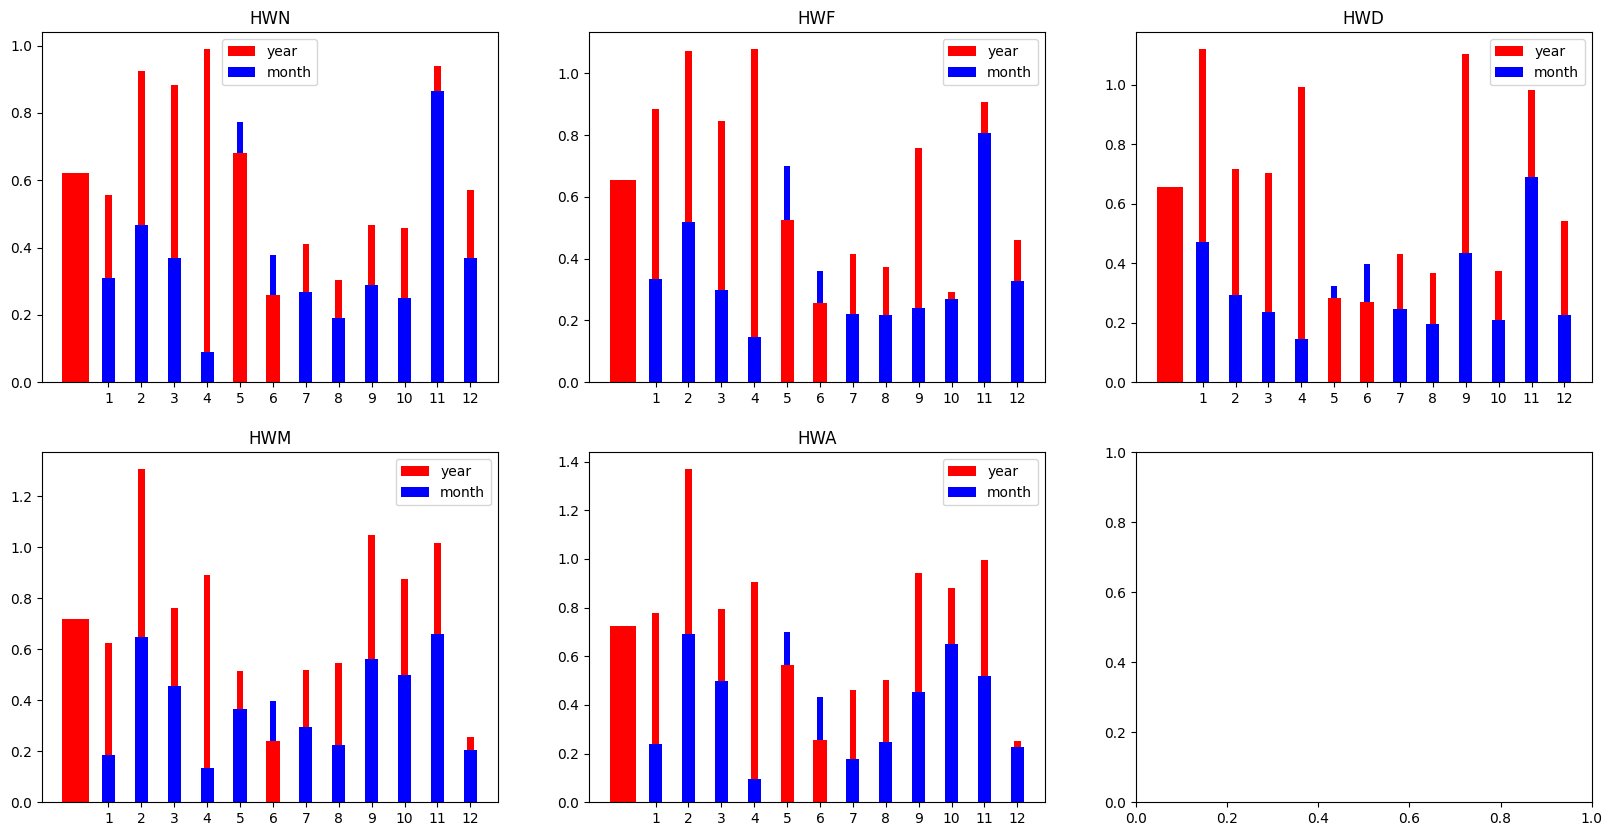

In [45]:
fig, axs = plt.subplots(2,3, figsize=(20,10))
axs = axs.flatten()
w=0.2
for i,label in enumerate(indices_of_interest):
    for k in range(12, -1, -1):
        if k == 0:
            axs[i].bar(k,[year_mae[i]], color='red')
        else:
            monthly_value = mae_seasons[(mae_seasons["season"]==k) & (mae_seasons["index"]==label)]["best_value"]
            year_value = mae_season[label][k-1]
            if float(year_value) > float(monthly_value.unique()):
                axs[i].bar(k,year_value, color='red',width=w)
                axs[i].bar(k,monthly_value, color='blue',width=2*w)
            else:
                axs[i].bar(k,monthly_value, color='blue',width=w)
                axs[i].bar(k,year_value, color='red',width=2*w)
        
    # axs[i].legend()
    axs[i].set_xticks(range(1,13))
    axs[i].set_title(f"{label}")
    axs[i].legend(["year", "month"])